In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
x = torch.linspace(-1,1,20)
ep = torch.rand(x.shape)*0.1
y = x**2+ep

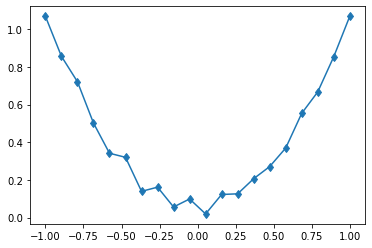

In [4]:
plt.plot(x,y, 'd-')

In [5]:
n = 20
layers = []
layers.append(nn.Linear(1,n))
layers.append(nn.ReLU())
layers.append(nn.Linear(n,n))
layers.append(nn.ReLU())
layers.append(nn.Linear(n,1))

mlp = nn.Sequential(*layers)

In [6]:
xb, yb = x[:, None], y[:, None]
print(x.shape, xb.shape)

torch.Size([20]) torch.Size([20, 1])


In [7]:
yprime = mlp(xb)
yprime.shape

torch.Size([20, 1])

In [8]:
yprime2 = yprime.squeeze().detach()

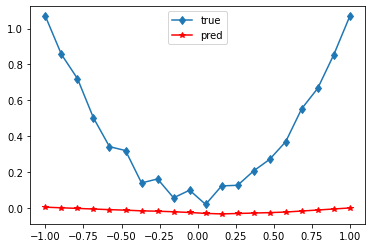

In [9]:
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

In [10]:
loss = F.mse_loss(yb,yprime )
loss

tensor(0.2985, grad_fn=<MeanBackward0>)

In [11]:
loss.backward()

In [12]:
lr  = 1e-1
for name, param in mlp.named_parameters():
#     print(param)
    param.data = param.data - param.grad*lr

In [13]:
mlp.zero_grad()

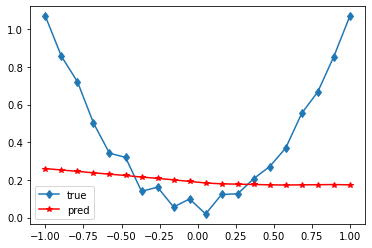

In [14]:
yprime = mlp(xb)
yprime2 = yprime.squeeze().detach()
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

# loop 

In [15]:
epochs = 100
for i in range(epochs):
    yprime = mlp(xb)
    loss = F.mse_loss(yb,yprime )
    loss.backward()
    lr  = 1e-1
    for name, param in mlp.named_parameters():
        param.data = param.data - param.grad*lr
    mlp.zero_grad()

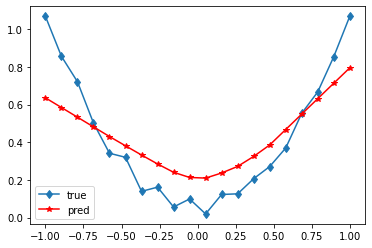

In [16]:
yprime = mlp(xb)
yprime2 = yprime.squeeze().detach()
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, yprime2, '*r-', label= 'pred')
plt.legend()

In [17]:
x2 = torch.linspace(-1,1,200)
x2b = x2[:, None]

In [18]:
y2prime = mlp(x2b)

In [19]:
y2prime_2 = y2prime.squeeze().detach()

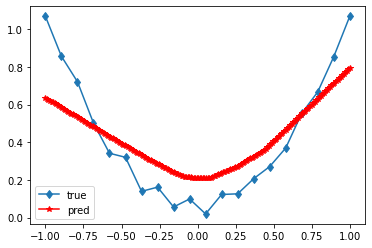

In [20]:
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x2, y2prime_2, '*r-', label= 'pred')
plt.legend()

# Starting here!

In [24]:
def make_mlp(n = 20, layer_count = 3):
    layers = []
    layers.append(nn.Linear(1,n))
    layers.append(nn.ReLU())
    for i in range(layer_count-2):
        layers.append(nn.Linear(n,n))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(n,1))

    mlp = nn.Sequential(*layers)
    return mlp

In [56]:
mlp = make_mlp(100,5)

In [57]:
mlp

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=100, bias=True)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=1, bias=True)
)

In [58]:
def do_step(my_mlp, lr = 1e-1):
    yprime = my_mlp(xb)
    loss = F.mse_loss(yb,yprime )
    loss.backward()
    for name, param in mlp.named_parameters():
        param.data = param.data - param.grad*lr
    mlp.zero_grad()
    return yprime.squeeze().detach()

In [59]:
for j in range(100):
    y3 = do_step(mlp)

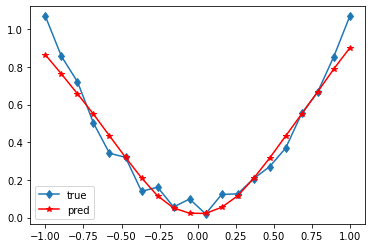

In [60]:
yprime = mlp(xb)
plt.plot(x,y, 'd-', label = 'true')
plt.plot(x, y3, '*r-', label= 'pred')
plt.legend()

In [21]:
from matplotlib.animation import FuncAnimation
from IPython import display

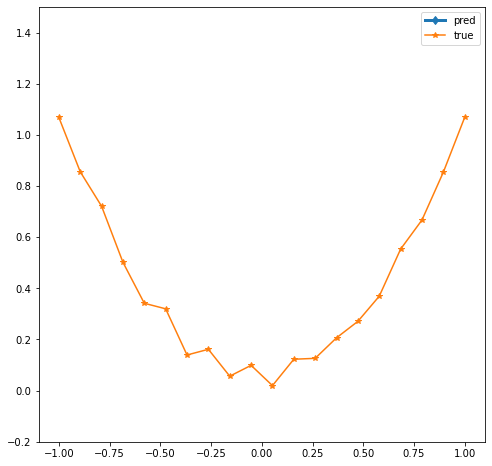

In [77]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(-1.1, 1.1), ylim=(-0.2, 1.5))
line, = ax.plot([], [],'d-', lw=3, label = 'pred')

ax.plot(x,y, "*-", label = 'true')
ax.legend()


In [78]:
def frame_function(frame_num, mlp_to_opt):
    if frame_num % 50 ==0: print(f"On frame {frame_num}")
    yout =  do_step(mlp_to_opt)
    line.set_data(x,yout)

In [81]:
mlp = make_mlp(100,5)

anim = FuncAnimation(fig, frame_function, fargs=(mlp,) , frames=500, interval=20, blit=False)

# plt.show()

In [82]:
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

On frame 0
On frame 0
On frame 50
On frame 100
On frame 150
On frame 200
On frame 250
On frame 300
On frame 350
On frame 400
On frame 450


In [84]:
mlp = make_mlp(100,5)
anim = FuncAnimation(fig, frame_function, fargs=(mlp,) , frames=500, interval=20, blit=False)
anim.save('myanim.gif')

On frame 0
On frame 0
On frame 50
On frame 100
On frame 150
On frame 200
On frame 250
On frame 300
On frame 350
On frame 400
On frame 450
